In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [38]:
raw_penguins = pd.read_csv("/Users/jaden/Documents/Professional/School/CSE 574/Assign1/noisy_datasets/penguins.csv")

In [39]:
df = pd.DataFrame(raw_penguins)
df.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0


In [40]:
print("shape of the dataframe:", df.shape)
print("types of all the columns:\n", df.dtypes)
print("\nMain statistics of the dataset:")
df.describe()

shape of the dataframe: (344, 10)
types of all the columns:
 species                    object
island                     object
calorie requirement         int64
average sleep duration      int64
bill_length_mm            float64
bill_depth_mm             float64
flipper_length_mm         float64
body_mass_g               float64
gender                     object
year                      float64
dtype: object

Main statistics of the dataset:


,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,337.000000,333.000000,336.000000,339.000000,342.000000
mean,5270.002907,10.447674,45.494214,18.018318,197.764881,4175.463127,2008.035088
std,1067.959116,2.265895,10.815787,9.241384,27.764491,858.713267,0.816938
min,3504.000000,7.000000,32.100000,13.100000,10.000000,882.000000,2007.000000
25%,4403.000000,9.000000,39.500000,15.700000,190.000000,3550.000000,2007.000000
50%,5106.500000,10.000000,45.100000,17.300000,197.000000,4050.000000,2008.000000
75%,6212.750000,12.000000,49.000000,18.700000,213.000000,4750.000000,2009.000000
max,7197.000000,14.000000,124.300000,127.260000,231.000000,6300.000000,2009.000000


This dataset is the information about singular penguins of mutiple species.
Each row is about one penguin and displays the geographical and physical information about the penguin.

In [41]:
print(df.isna().sum())

species                   11
island                    10
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                    17
year                       2
dtype: int64


Gender seems to have the most missing values.

In [42]:
df_cleaned = df.dropna().copy()
df_cleaned.shape
#I'm dropping the null values since there isn't much dropped

(305, 10)

We lost 44 rows of data by dropping it.

In [43]:
df_cleaned['species'] = df_cleaned['species'].str.lower()
df_cleaned['island'] = df_cleaned['island'].str.lower()
df_cleaned['gender'] = df_cleaned['gender'].str.lower()
df_cleaned.shape
#I am making all the letters in the columns lowercase so it becomes uniform

(305, 10)

For things like Species I decided to make all the letters lowercase to make it all the same

In [44]:
print(df['species'].unique())
print(df_cleaned['species'].unique())
df_cleaned.shape

['Adelie' 'adelie' nan 'Gentoo' 'gentoo' 'GENTOO' 'Chinstrap' 'CHINSTRAP'
 'chinstrap']
['adelie' 'gentoo' 'chinstrap']


(305, 10)

You can see here now, instead of having multiple versions of the species, there are only 3. I do the same for the rest of the object columns.

In [45]:
#step 1.6
for col in df_cleaned.select_dtypes(include=['number']).columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df_cleaned[(df_cleaned[col] >= Q1 - 1.5*IQR) & (df_cleaned[col] <= Q3 + 1.5*IQR)]
print(df_cleaned.shape)
#I used IQR tukey fence to deal with outliers

(300, 10)


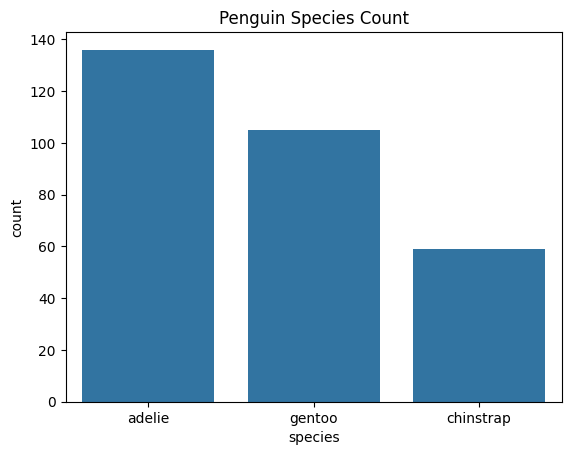

In [46]:
#step 1.7
sns.countplot(x='species', data=df_cleaned)
plt.title("Penguin Species Count")
plt.show()

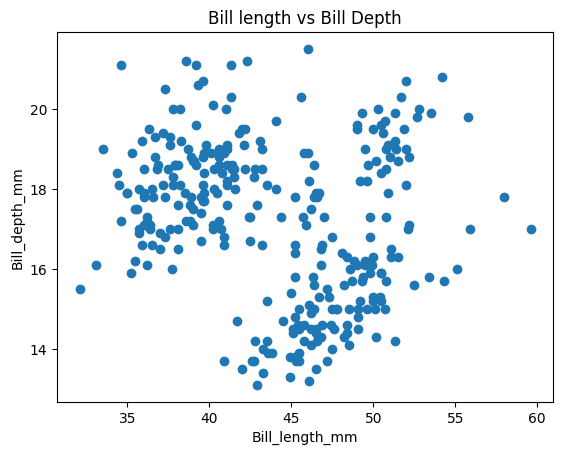

In [47]:
#looking to see if there is a relationship between bill length and bill depth
plt.scatter(df_cleaned['bill_length_mm'], df_cleaned['bill_depth_mm'])
plt.xlabel('Bill_length_mm')
plt.ylabel('Bill_depth_mm')
plt.title('Bill length vs Bill Depth')
plt.show()

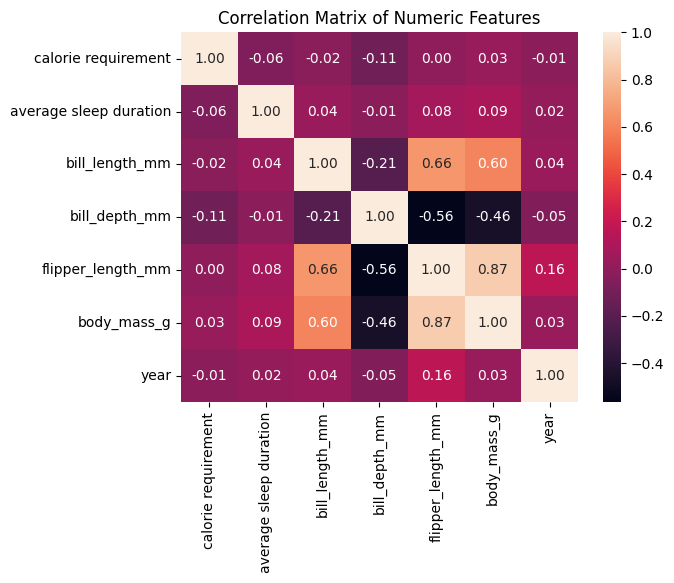

In [48]:
corr = df_cleaned.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [49]:
#step 1.8
df_encoded = pd.get_dummies(df_cleaned, columns=['gender'], drop_first=True)
df_encoded.head()
corr = df_encoded.corr(numeric_only=True)
print(corr['gender_male'].sort_values(ascending=False))

#I used one-hot encoding for the gender encoding
#year and calorie requirement can be considered uncorrelated since their score is under .05


gender_male               1.000000
body_mass_g               0.436215
bill_depth_mm             0.375190
bill_length_mm            0.368319
flipper_length_mm         0.269758
average sleep duration    0.078985
year                      0.015449
calorie requirement      -0.007381
Name: gender_male, dtype: float64


In [50]:
#step 1.9
df_encoded = pd.get_dummies(df_cleaned, columns=['species', 'island', 'gender'], drop_first=True)
df_encoded.head()
#I also used one hot encoding for the rest


,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_chinstrap,species_gentoo,island_dream,island_torgersen,gender_male
0,6563,11,39.1,18.7,181.0,3750.0,2007.0,False,False,False,True,True
1,4890,14,39.5,17.4,186.0,3800.0,2007.0,False,False,False,True,False
2,7184,11,40.3,18.0,195.0,3250.0,2007.0,False,False,False,True,False
4,4774,8,36.7,19.3,193.0,3450.0,2007.0,False,False,False,True,False
5,4403,13,39.3,20.6,190.0,3650.0,2007.0,False,False,False,True,True


In [51]:
#step 1.10
num_cols = df_encoded.select_dtypes(include=['number']).columns
print(num_cols)
for col in num_cols:
    min_val = df_encoded[col].min()
    max_val = df_encoded[col].max()
    df_encoded[col] = (df_encoded[col] - min_val) / (max_val - min_val)
df_encoded.head()
#I used min max to make all the numeric values between 0 and 1

Index(['calorie requirement', 'average sleep duration', 'bill_length_mm',
       'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')


,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_chinstrap,species_gentoo,island_dream,island_torgersen,gender_male
0,0.828324,0.571429,0.254545,0.666667,0.152542,0.291667,0.0,False,False,False,True,True
1,0.375305,1.000000,0.269091,0.511905,0.237288,0.305556,0.0,False,False,False,True,False
2,0.996480,0.571429,0.298182,0.583333,0.389831,0.152778,0.0,False,False,False,True,False
4,0.343894,0.142857,0.167273,0.738095,0.355932,0.208333,0.0,False,False,False,True,False
5,0.243434,0.857143,0.261818,0.892857,0.305085,0.263889,0.0,False,False,False,True,True


**STEP 2**

In [52]:
def PreprocessPipeline(df: pd.DataFrame):
    #drop missing columns
    df_cleaned = df.dropna().copy()

    num_cols = df_cleaned.select_dtypes(include=['number']).columns
    cat_cols = df_cleaned.select_dtypes(include=['object']).columns

    #cleaning string formats
    for col in cat_cols:
        df_cleaned[col] = df_cleaned[col].str.lower()
    #handle outliers using quantiles
    for col in num_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        df_cleaned = df_cleaned[(df_cleaned[col] >= Q1 - 1.5*IQR) & (df_cleaned[col] <= Q3 + 1.5*IQR)]
    #encoding object columns
    df_cleaned = pd.get_dummies(df_cleaned, columns=cat_cols, drop_first=True)


    #Scaling numeric features
    for col in num_cols:
        min_val = df_cleaned[col].min()
        max_val = df_cleaned[col].max()
        df_cleaned[col] = (df_cleaned[col] - min_val) / (max_val - min_val)
    return df_cleaned
    

For my preproccessing pipeline I first dropped any rows with null values. 

When taking care of the formatting for the object variables, I made it to where all object strings are lower case so they can all be the same.

for the outliers I removed any data point in the columns that is outside a certain range between the Q1 and IQR and Q3 and IQR.

For encoding I used the get_dummies function to encode the categories into booleans 

For the scaling I used MinMax scaling for all the columns to make it within the range of 0 and 1

In [53]:
penguins_raw = pd.read_csv("noisy_datasets/penguins.csv")
penguins_df = pd.DataFrame(penguins_raw)
penguins_proccessed = PreprocessPipeline(penguins_df)
penguins_proccessed.head()
penguins_proccessed.to_csv("penguins_preprocessed.csv", index=False)
if df_encoded.equals(penguins_proccessed):
    print("The dataframes are equal!")
else:
    print("Dataframes arent equal")
# This shows if the dataframes were equal or not to check



The dataframes are equal!


**Step 3**

**first dataset**

In [54]:
emissions_raw = pd.read_csv("noisy_datasets/emissions_by_country.csv")
emissions_df = pd.DataFrame(emissions_raw)
print("first 5 rows:", emissions_df.head())
print("shape of df:", emissions_df.shape)
print("types:\n", emissions_df.dtypes)

first 5 rows:        Country ISO 3166-1 alpha-3    Year  Total  Temperature  \
0  Afghanistan                AFG  1750.0    0.0           70   
1  Afghanistan                AFG  1751.0    0.0           66   
2  Afghanistan                AFG  1752.0    0.0           72   
3  Afghanistan                AFG  1753.0    0.0           44   
4  Afghanistan                AFG  1754.0    0.0           21   

   GDP Per Capita (USD)  Coal  Oil  Gas  Cement  Flaring  Other  Per Capita  
0                 55455   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
1                 45101   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
2                 31891   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
3                 35466   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
4                 33247   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
shape of df: (63104, 13)
types:
 Country                  object
ISO 3166-1 alpha-3       object
Year                    float6

This is a dataframe about emissions information from mutiple countries

In [55]:
#creating a binary category since it does not already have one
emissions_df['High_GDP'] = (emissions_df['GDP Per Capita (USD)'] > emissions_df['GDP Per Capita (USD)'].median()).astype(int)
print(emissions_df['High_GDP'].value_counts())
#Its not unbalanced at all


High_GDP
0    31553
1    31551
Name: count, dtype: int64


In [56]:
emissions_processed = PreprocessPipeline(emissions_df)
emissions_processed.head()

,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,...,ISO 3166-1 alpha-3_lux,ISO 3166-1 alpha-3_lva,ISO 3166-1 alpha-3_mlt,ISO 3166-1 alpha-3_nor,ISO 3166-1 alpha-3_nzl,ISO 3166-1 alpha-3_prt,ISO 3166-1 alpha-3_rou,ISO 3166-1 alpha-3_svk,ISO 3166-1 alpha-3_svn,ISO 3166-1 alpha-3_swe
3504,0.000000,0.442921,0.525424,0.565656,0.180041,0.556867,0.258145,0.483157,0.092342,0.521917,...,False,False,False,False,False,False,False,False,False,False
3505,0.032258,0.468628,0.915254,0.277018,0.185607,0.605343,0.272648,0.476401,0.100478,0.468964,...,False,False,False,False,False,False,False,False,False,False
3506,0.064516,0.429339,0.983051,0.297855,0.142792,0.581082,0.273027,0.500167,0.108655,0.442304,...,False,False,False,False,False,False,False,False,False,False
3507,0.096774,0.432387,0.949153,0.518012,0.131752,0.602595,0.284006,0.482790,0.101418,0.444037,...,False,False,False,False,False,False,False,False,False,False
3508,0.129032,0.435067,0.084746,0.407485,0.133567,0.591941,0.297827,0.499514,0.115441,0.454996,...,False,False,False,False,False,False,False,False,False,False


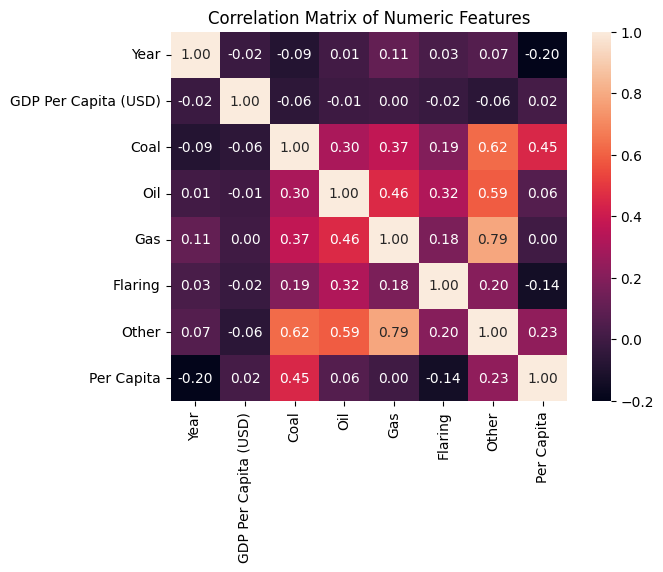

In [57]:
corr = emissions_processed[['Year', 'GDP Per Capita (USD)', 'Coal', 'Oil', 'Gas', 'Flaring', 'Other', 'Per Capita']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

This is a correlation matrix for the numerica features of the emissions dataset. 

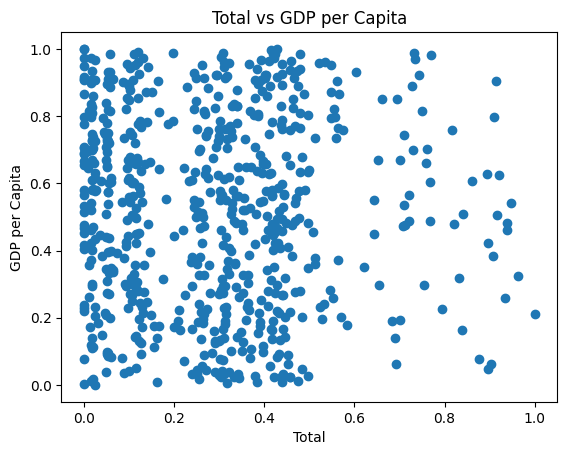

In [58]:
plt.scatter(emissions_processed['Total'], emissions_processed['GDP Per Capita (USD)'])
plt.xlabel('Total')
plt.ylabel('GDP per Capita')
plt.title('Total vs GDP per Capita')
plt.show()

This is a scatter plot of the total vs the GDP per capita. There doesn't seem to be a clear relationship between the two

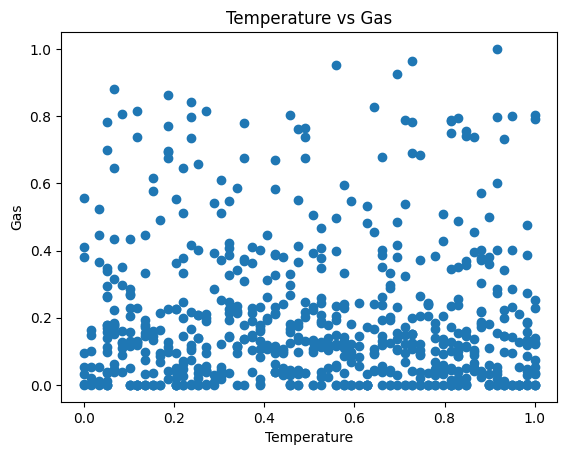

In [59]:
plt.scatter(emissions_processed['Temperature'], emissions_processed['Gas'])
plt.xlabel('Temperature')
plt.ylabel('Gas')
plt.title('Temperature vs Gas')
plt.show()

This is a scatter plot of the temperature vs Gas. There doesn't seem to be a clear relationship between the two.

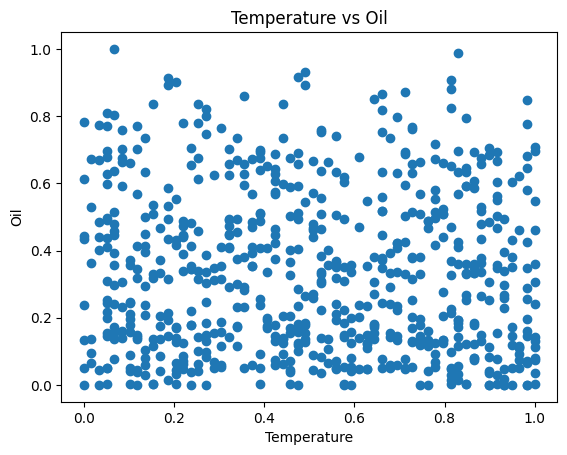

In [60]:
plt.scatter(emissions_processed['Temperature'], emissions_processed['Oil'])
plt.xlabel('Temperature')
plt.ylabel('Oil')
plt.title('Temperature vs Oil')
plt.show()

This is a scatter plot of the temperature vs Oil. There doesn't seem to be a clear relationship between the two.

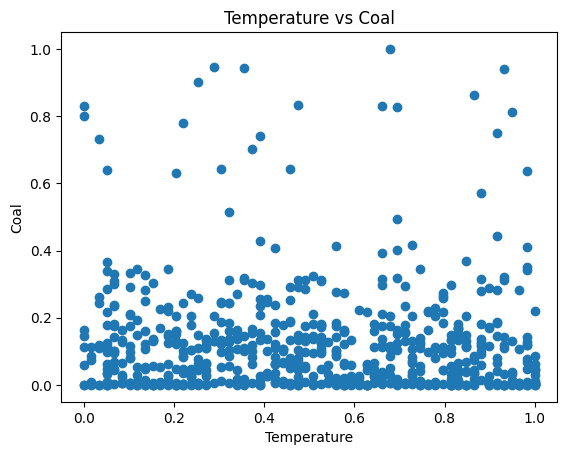

In [61]:
plt.scatter(emissions_processed['Temperature'], emissions_processed['Coal'])
plt.xlabel('Temperature')
plt.ylabel('Coal')
plt.title('Temperature vs Coal')
plt.show()

This is a scatter plot of the temperature vs Coal. There doesn't seem to be a clear relationship between the two.

In [62]:
emissions_processed.to_csv("emissions_preprocessed.csv", index=False)

**Step 3 dataset 2**

In [63]:
diamond_raw = pd.read_csv("noisy_datasets/diamond.csv")
diamond_df = pd.DataFrame(diamond_raw)
print("first 5 rows:", diamond_df.head())
print("shape of df:", diamond_df.shape)
print("types:\n", diamond_df.dtypes)

first 5 rows:   Unnamed: 0 carat      cut color clarity  average us salary  \
0          1  0.23    Ideal     E     SI2              31282   
1          2  0.21  Premium     E     SI1              40049   
2          3  0.23     Good     E     VS1              33517   
3          4  0.29  Premium     I     VS2              38495   
4          5  0.31     Good     J     SI2              34178   

   number of diamonds mined (millions) depth table price     x     y     z  
0                                 5.01  61.5    55   326  3.95  3.98  2.43  
1                                 1.69  59.8    61   326  3.89  3.84  2.31  
2                                 3.85  56.9    65   327  4.05  4.07  2.31  
3                                 3.49  62.4    58   334   4.2  4.23  2.63  
4                                 4.70  63.3    58   335  4.34  4.35  2.75  
shape of df: (53940, 13)
types:
 Unnamed: 0                              object
carat                                   object
cut         

This dataset is about diamond mines and the type of diamonds that come out of them and their price.

In [64]:
diamond_df["average us salary"] = pd.to_numeric(diamond_df["average us salary"], errors="coerce").astype("Int64")
diamond_df["carat"] = pd.to_numeric(diamond_df["carat"], errors="coerce").astype("Float64")
diamond_df["depth"] = pd.to_numeric(diamond_df["depth"], errors="coerce").astype("Float64")
diamond_df["table"] = pd.to_numeric(diamond_df["table"], errors="coerce").astype("Float64")
diamond_df["price"] = pd.to_numeric(diamond_df["price"], errors="coerce").astype("Float64")
diamond_df["x"] = pd.to_numeric(diamond_df["x"], errors="coerce").astype("Float64")
diamond_df["y"] = pd.to_numeric(diamond_df["y"], errors="coerce").astype("Float64")
diamond_df["z"] = pd.to_numeric(diamond_df["z"], errors="coerce").astype("Float64")
diamond_df = diamond_df.drop('Unnamed: 0', axis=1)
diamond_df.dtypes

carat                                  Float64
cut                                     object
color                                   object
clarity                                 object
average us salary                        Int64
number of diamonds mined (millions)    float64
depth                                  Float64
table                                  Float64
price                                  Float64
x                                      Float64
y                                      Float64
z                                      Float64
dtype: object

In [65]:
price_numeric = pd.to_numeric(diamond_df['price'], errors="coerce")
median_price = price_numeric.median()
diamond_df['High_Price'] = (price_numeric > median_price).astype('Int64')  
print(diamond_df['High_Price'].value_counts())


High_Price
0    25942
1    25902
Name: count, dtype: Int64


This looks at whether or not a diamond is high price or not, and it is not unbalanced

In [66]:
diamond_processed = PreprocessPipeline(diamond_df)
diamond_processed.head()

,carat,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z,High_Price,...,color_true,clarity_i1,clarity_if,clarity_si1,clarity_si2,clarity_true,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
0,0.016667,0.067477,0.958696,0.446429,0.26087,0.0,0.048458,0.065359,0.277929,0.0,...,False,False,False,False,True,False,False,False,False,False
1,0.005556,0.528923,0.236957,0.142857,0.782609,0.0,0.035242,0.034858,0.245232,0.0,...,False,False,False,True,False,False,False,False,False,False
3,0.05,0.447129,0.628261,0.607143,0.521739,0.000746,0.103524,0.119826,0.332425,0.0,...,False,False,False,False,False,False,False,True,False,False
4,0.061111,0.219906,0.891304,0.767857,0.521739,0.000839,0.134361,0.145969,0.365123,0.0,...,False,False,False,False,True,False,False,False,False,False
5,0.022222,0.773725,0.056522,0.678571,0.434783,0.000932,0.046256,0.061002,0.291553,0.0,...,False,False,False,False,False,False,False,False,False,True


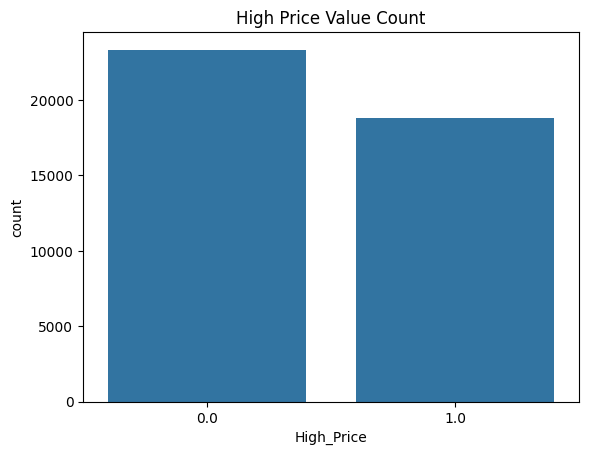

In [67]:
sns.countplot(x='High_Price', data=diamond_processed)
plt.title("High Price Value Count")
plt.show()

This is the count high price vs low price based on median price after nulls were dropped

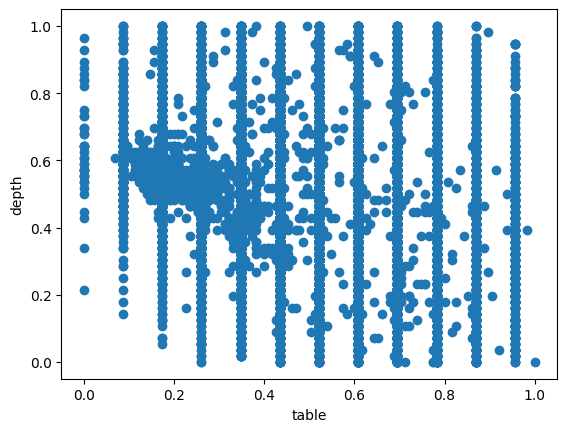

In [68]:
plt.scatter(diamond_processed['table'], diamond_processed['depth'])
plt.xlabel('table')
plt.ylabel('depth')
plt.show()

This is the plot of table vs depth, there is no clear relationship

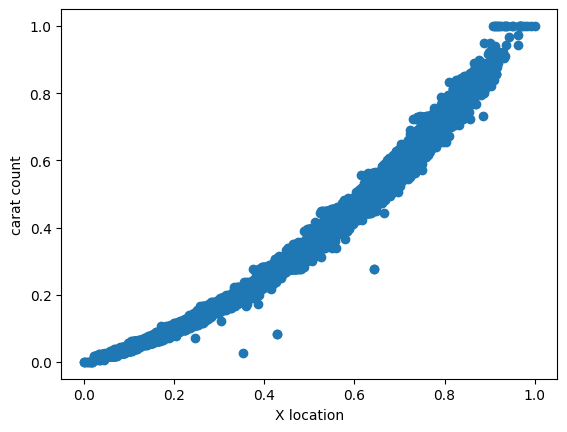

In [69]:
plt.scatter(diamond_processed['x'], diamond_processed['carat'])
plt.xlabel("X location")
plt.ylabel('carat count')
plt.show()

There is a relationship between the x location and the carat count

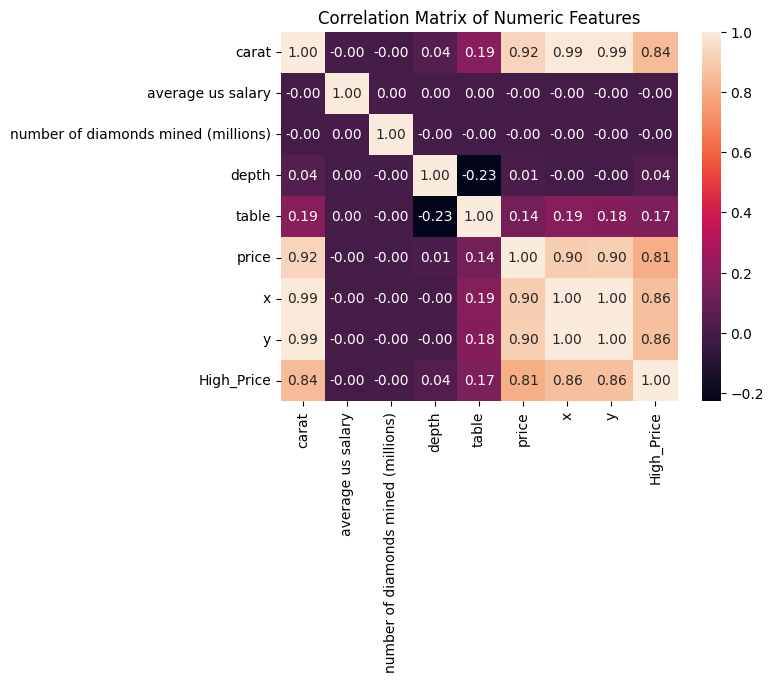

In [70]:
corr = diamond_processed[['carat', 'average us salary', 'number of diamonds mined (millions)', 'depth', 'table', 'price', 'x', 'y', 'High_Price']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

This is a correlation matrix for the variables

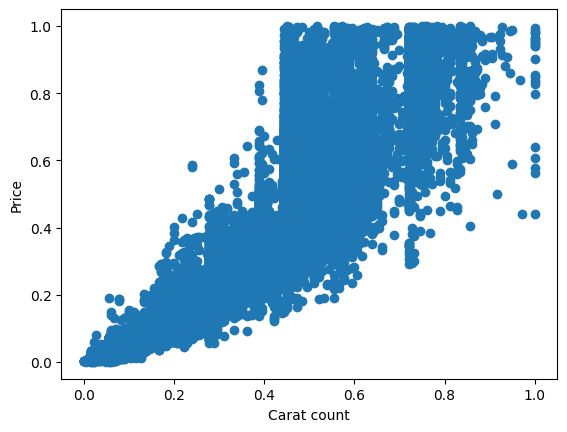

In [71]:
plt.scatter(diamond_processed['carat'], diamond_processed['price'])
plt.xlabel('Carat count')
plt.ylabel('Price')
plt.show()

This is a graph that shows carat count compared to the price. There is a clear relationship between increase in carat count and the price.

In [72]:
diamond_processed.to_csv("diamond_preprocessed.csv", index=False)

Reference:
https://www.geeksforgeeks.org/machine-learning/ml-one-hot-encoding/
https://seaborn.pydata.org/
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html
https://matplotlib.org/stable/api/index.html